## Data Analysis to Explore Military Expenditures of Different Countries
Data source can be accessed here https://www.sipri.org/databases/milex.   "SIPRI Military Expenditure Database 2023, https://www.sipri.org/databases/milex"

Dataset was downloaded from Kaggle, https://www.kaggle.com/datasets/febinphilips/militaru
The Kaggle dataset had some formatting to remove rows that contained notes, making it easier to load into pandas dataframes

Questions to explore:
1. What are the top countries in terms of defense spending?  
2. What is spending per capita and as a percentage of GDP?
3. Are there any relationships between spending and the geopolitical landscape?
4. Are there patterns to regional spending?

In [1]:
# import packages for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Loading Dataset and Initial Exploration.
Will need to import each tab as a separate dataframe from the excel file.  
Tab 'Current US$' name was changed to 'Current USD' in the excel file to avoid import errors.
- df_GDP loads the military expenditure as a percentage of country's GDP
- df_USD loads the military spend in 2022 USD for each country
- df_govt_spend loads the military spend as a percentage of government spending
- df_per_capita loads the miliatry spend per person in the country's population

In [22]:
# import data from the excel files into separate dataframes

df_GDP = pd.read_excel('mil_exp.xlsx', sheet_name='Share of GDP')
df_USD = pd.read_excel('mil_exp.xlsx', sheet_name='Current USD')
df_govt_spend = pd.read_excel('mil_exp.xlsx', sheet_name='Share of Govt. spending')
df_per_capita = pd.read_excel('mil_exp.xlsx', sheet_name='Per capita')

## Notes for column headings in analysis
			
 
- df_USD: Data for military expenditure by country in current (2022) US dollars (millions)
- df_GDP: Data for military expenditure by country as a share of GDP
- df_govt_spend: Data for military expenditure as a percentage of general government expenditure
- df_per_caita: Data for military expenditure per capita, in current US$

See Notes.txt for more details on the full dataset descriptions

In [3]:
# investigate the data columns and format, begin with df_GDP
df_GDP.head()

,Region,Country,1949,1950,1951,1952,1953,1954,1955,1956,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Notes
0,North Africa,Algeria,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.055485,0.062702,0.063849,0.059244,0.054836,0.059997,0.066925,0.055854,0.047794,#gid=126130878&range=A15
1,North Africa,Libya,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.154796,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,#gid=126130878&range=A27
2,North Africa,Morocco,xxx,xxx,xxx,xxx,xxx,xxx,xxx,0.011807,...,0.036779,0.032302,0.032206,0.031838,0.031301,0.030821,0.042097,0.039428,0.039049,#gid=126130878&range=A28
3,North Africa,Tunisia,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.018069,0.021396,0.02225,0.020318,0.019764,0.023833,0.027098,0.026367,0.024768,NaN
4,sub-Saharan Africa,Angola,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.046985,0.031054,0.027333,0.02508,0.019558,0.017391,0.017002,0.012899,0.013287,#gid=126130878&range=A12


In [4]:
print(df_GDP.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 77 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Region   175 non-null    object
 1   Country  175 non-null    object
 2   1949     174 non-null    object
 3   1950     174 non-null    object
 4   1951     174 non-null    object
 5   1952     174 non-null    object
 6   1953     174 non-null    object
 7   1954     174 non-null    object
 8   1955     174 non-null    object
 9   1956     174 non-null    object
 10  1957     174 non-null    object
 11  1958     174 non-null    object
 12  1959     174 non-null    object
 13  1960     174 non-null    object
 14  1961     174 non-null    object
 15  1962     174 non-null    object
 16  1963     174 non-null    object
 17  1964     174 non-null    object
 18  1965     174 non-null    object
 19  1966     174 non-null    object
 20  1967     174 non-null    object
 21  1968     174 non-null    object
 22  19

## Data Cleaning Tasks
- Evidence of missing data from column information.  Plan is to focus on spending in 2022. 
- Also, the use of 'xxx' to indicate lack of data.  This will need to be replaced with null.
- Replace 'United States of America'with 'USA' to improve labelling plots.

In [5]:
# Need replace 'xxx' with NaN and 'Country' column value 'United States of America' with 'USA'
replace_dict = {'xxx': np.nan, 'United States of America': 'USA'}

# apply dictionary to all the dataframes generated
df_GDP.replace(replace_dict, inplace=True)
df_USD.replace(replace_dict, inplace=True)
df_govt_spend.replace(replace_dict, inplace=True)
df_per_capita.replace(replace_dict, inplace=True)

## Joining Dataframes
- Each of the dataframes show a parameter that changes over time.
- Join the dataframes on year '2022' to create comparisons of different paramaters
- Create a dataframe 'df_2022' that contains all data for year '2022'

In [6]:
# create the base df with df_2022 starting with df_USD filter 'Region', 'Country' and year 2022
df_2022 = df_USD[['Region', 'Country', 2022]]


# merge df_GDP on the 'Country' column
df_2022 = df_2022.merge(df_GDP[['Country', 2022]], on = 'Country', suffixes=('_USD', '_GDP'))
df_2022.head() #check to see merge worked correctly

,Region,Country,2022_USD,2022_GDP
0,North Africa,Algeria,9145.810174,0.047794
1,North Africa,Libya,NaN,NaN
2,North Africa,Morocco,4995.028074,0.039049
3,North Africa,Tunisia,1156.186916,0.024768
4,sub-Saharan Africa,Angola,1622.763732,0.013287


In [7]:
# Now merge df_govt_spend and df_per_capita for 2022 into the base dataframe, df_2022
df_2022 = df_2022.merge(df_govt_spend[['Country', 2022]], on = 'Country')
df_2022 = df_2022.merge(df_per_capita[['Country', 2022]], on = 'Country', suffixes=('_govt_spend', '_per_capita'))
df_2022.head()

,Region,Country,2022_USD,2022_GDP,2022_govt_spend,2022_per_capita
0,North Africa,Algeria,9145.810174,0.047794,0.132994,201.671669
1,North Africa,Libya,NaN,NaN,NaN,NaN
2,North Africa,Morocco,4995.028074,0.039049,0.120562,132.238056
3,North Africa,Tunisia,1156.186916,0.024768,0.069749,95.973015
4,sub-Saharan Africa,Angola,1622.763732,0.013287,0.068990,46.328939


## Exploratory Analysis
- Investigate the top spending countries in terms of USD.  
- Explore spending per capita
- Study spending as a percentage of GDP and overall government spending

In [8]:
# Sort the values by top military spenders
df_2022 = df_2022.sort_values(by='2022_USD', ascending=False)

# filter the results for the top 15 countries by total military spending
top_15 = df_2022.iloc[:15]

# examine the results
top_15.head(15)

,Region,Country,2022_USD,2022_GDP,2022_govt_spend,2022_per_capita
65,North America,USA,876943.200000,0.034549,NaN,NaN
87,East Asia,China,291958.428460,0.015954,0.047921,201.563185
134,Eastern Europe,Russia,86373.102251,0.040563,0.103513,592.383731
83,South Asia,India,81363.188269,0.024252,0.082601,57.842555
168,Middle East,Saudi Arabia,75013.333333,0.074227,0.277903,2092.714000
156,Western Europe,United Kingdom,68462.578612,0.022272,0.052882,999.482884
143,Western Europe,Germany,55759.747827,0.013901,0.027462,664.724475
142,Western Europe,France,53638.748769,0.019387,0.034341,817.850862
90,East Asia,"Korea, South",46365.420707,0.027177,0.105696,903.281136
88,East Asia,Japan,45992.092172,0.010777,0.025316,366.222815


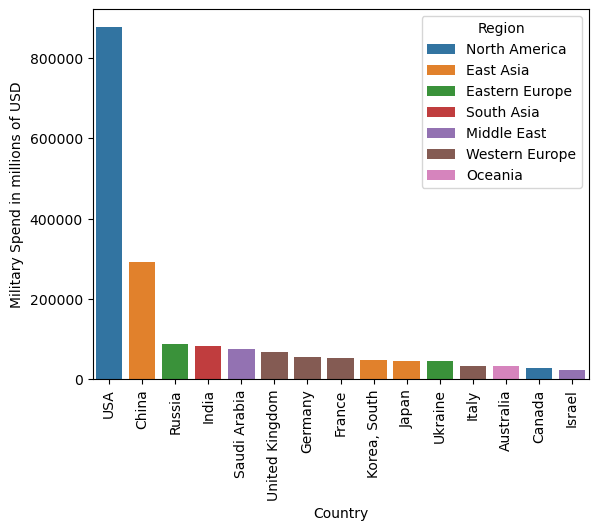

In [9]:
# Generate a bar plot using seaborn
sns.barplot(data = top_15, x='Country', y='2022_USD', hue='Region', dodge=False)
plt.ylabel("Military Spend in millions of USD")
plt.xticks(rotation=90)
plt.show()

## Total Military Spending
The US spent approximately $880 Billion on defense in 2022.  This amount is approximately 3 times the next largest spender, China.
Except for China and Inda, the top military spenders are concentrated in Europe and the Middle East.  This corresponds to the countries with the largest economies.


## US missing data
US government spending and population data is missing from the data set. These will be added.
- US govt spending 6.27 trillion in 2022 (from FiscalData.treasury.gov)
- US population approximately 333 million from Census data

In [10]:
# code to show missing US data
df_govt_spend[df_govt_spend['Region']=='North America']

,Region,Country,1988,1989,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Notes
64,North America,Canada,0.043408,0.041869,0.039819,0.035988,0.03457,0.034449,0.033695,0.031727,...,0.025799,0.028804,0.028566,0.033417,0.032405,0.031627,0.026462,0.027868,0.028777,NaN
65,North America,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#gid=126130878&range=A55


In [11]:
# update the missing data for USA for columns '2022_govt_spend' and '2022_per_capita'
df_2022.loc[df_2022['Country']=='USA', '2022_govt_spend'] = df_2022.loc[df_2022['Country']=='USA', '2022_USD']/6270000
df_2022.loc[df_2022['Country']=='USA', '2022_per_capita'] = df_2022.loc[df_2022['Country']=='USA', '2022_USD']/333

In [12]:
df_2022.head(5)  # check that data and calculations are added correctly

,Region,Country,2022_USD,2022_GDP,2022_govt_spend,2022_per_capita
65,North America,USA,876943.200000,0.034549,0.139863,2633.463063
87,East Asia,China,291958.428460,0.015954,0.047921,201.563185
134,Eastern Europe,Russia,86373.102251,0.040563,0.103513,592.383731
83,South Asia,India,81363.188269,0.024252,0.082601,57.842555
168,Middle East,Saudi Arabia,75013.333333,0.074227,0.277903,2092.714000


## Perform Analysis of Military Spending
- Examine spending as a percentage of GPD, Gov't Spending and per capita.

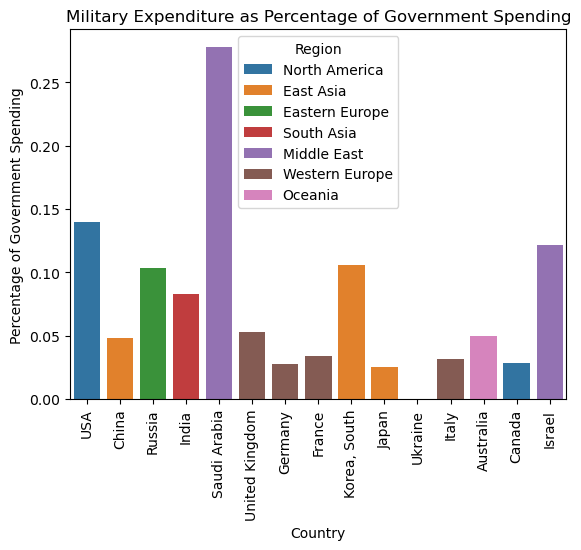

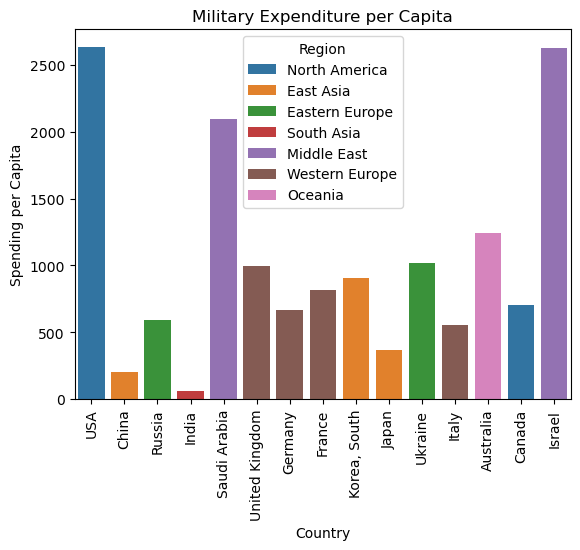

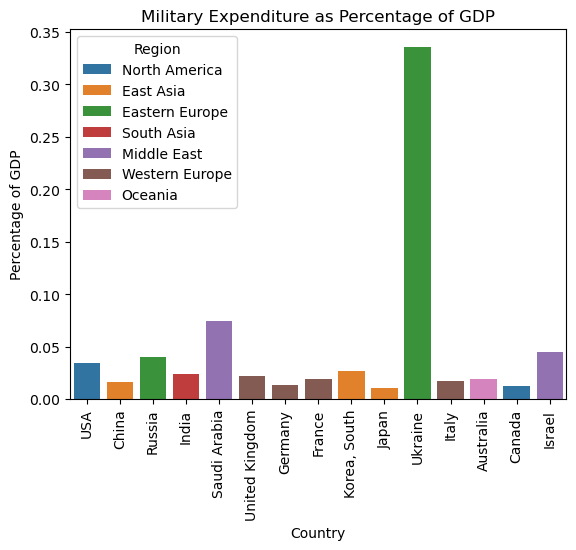

In [13]:
# Filter the top fifteen countries by military spending
top_15_clean = df_2022.iloc[:15]
# now generate plots for analysis

sns.barplot(data = top_15_clean, x='Country', y='2022_govt_spend', hue='Region', dodge=False)
plt.ylabel('Percentage of Government Spending')
plt.title('Military Expenditure as Percentage of Government Spending')
plt.xticks(rotation=90)
plt.show()
sns.barplot(data = top_15_clean, x='Country', y='2022_per_capita', hue='Region', dodge=False)
plt.ylabel('Spending per Capita')
plt.title('Military Expenditure per Capita')
plt.xticks(rotation=90)
plt.show()
sns.barplot(data = top_15_clean, x='Country', y='2022_GDP', hue='Region', dodge=False)
plt.ylabel('Percentage of GDP')
plt.title('Military Expenditure as Percentage of GDP')
plt.xticks(rotation=90)
plt.show()


## Results
The top 15 countries for military expenditure have some interesting results.  
- The US is does not spend the most in terms of percentage of GDP or Government spending.  The overall larger US spend per capita comes from the greater wealth and size of the economy. 
- Saudi Arabia and Israel are the largest spenders in terms of percentage of GDP and government spending of the top 15 countries. The geopolitical situation in and surrounding Israel can account for the higher military spend. Notes from the data set describe the numbers for Saudi Arabia as being more prone to error due to lack of transparency.
- The approximate 33% of GDP in military spending for Ukraine can be accounted for by the war which started in Feb 2022, and also the significant drop in productivity due to the war. 

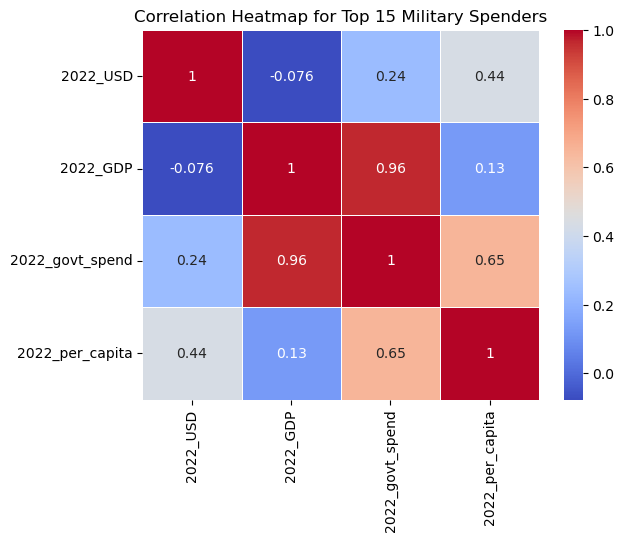

In [14]:
# Create correlation table to investigate the relationship between the different parameters.
# perform this for the top 15 military spenders
df_corr_table = top_15_clean[['2022_USD', '2022_GDP', '2022_govt_spend', '2022_per_capita']].corr()

df_corr_table
sns.heatmap(df_corr_table, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Top 15 Military Spenders')
plt.show()



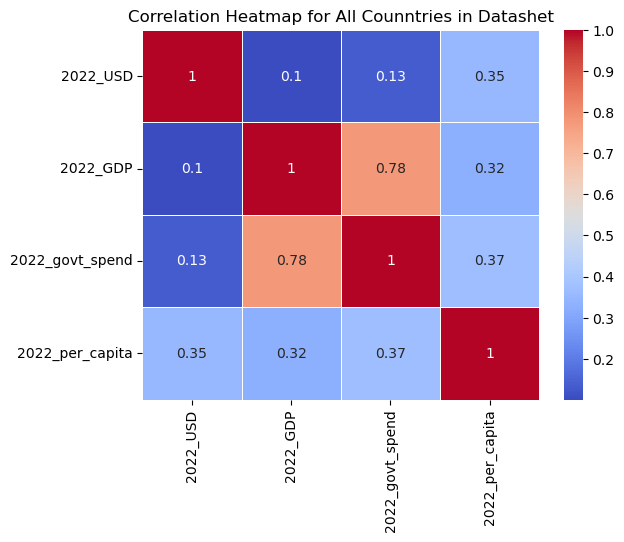

In [15]:
# Create heatmap for all countries in dataset
df_corr_table = df_2022[['2022_USD', '2022_GDP', '2022_govt_spend', '2022_per_capita']].corr()

df_corr_table
sns.heatmap(df_corr_table, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for All Counntries in Datashet')
plt.show()


## Correlation Notes
- The only strong correlation (+0.96) occurs between the percentage of government spending and the percentage of GDP. This means that countries that allocate a higher portion of government spending also then allocate a greater portion of the overall GDP towards the military.
- This correlation is weaker (+0.78) when all the countries in the dataset are included.
- There is also weak positive correlation also between the per capita spending and the other data columns.  In general, for countries that spend more per person on the military, a higher USD amount is spent on the military and a greater portion of government and GDP is allocated.
- Next step is to investigate the distribution spending as a percentage of government spending and percentage of GDP.

C:\Users\ptbea\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


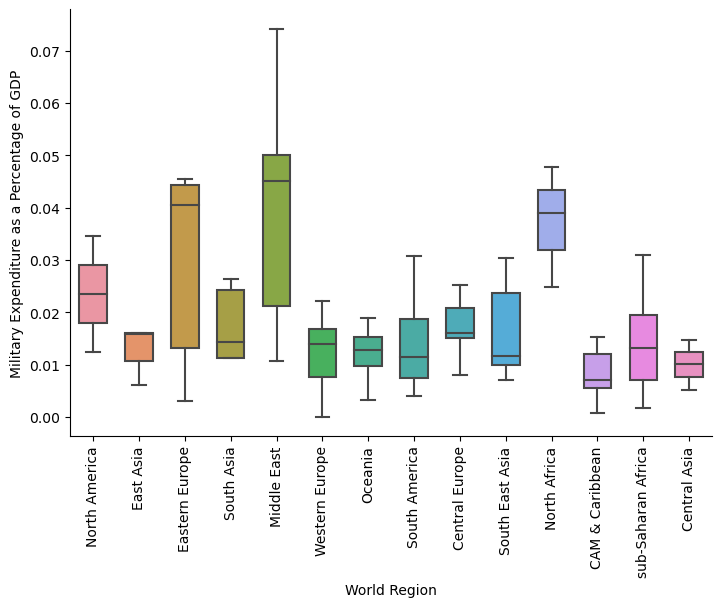

In [16]:
# Create boxplots of the percentage spends
# need to change a region value to make it easier for visualization
df_2022['Region'] = df_2022['Region'].replace({'Central America and the Caribbean': 'CAM & Caribbean'})

# note that outliers have been removed
g = sns.catplot(x="Region", y="2022_GDP", data=df_2022, kind='box', sym='', width=0.6, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set_axis_labels("World Region", 'Military Expenditure as a Percentage of GDP')
plt.show()

C:\Users\ptbea\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


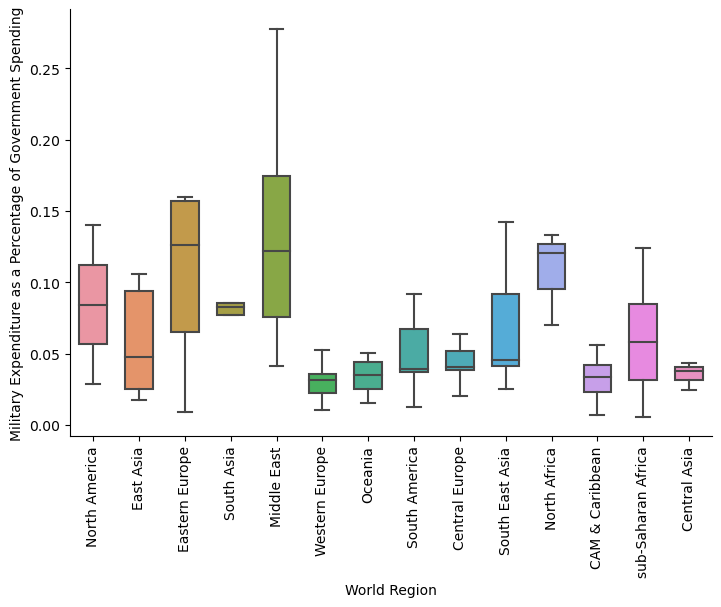

In [17]:
# Create boxplots of the percentage spends
# note that outliers have been removed
g = sns.catplot(x="Region", y="2022_govt_spend", data=df_2022, kind='box', sym='', width=0.6, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set_axis_labels("World Region", 'Military Expenditure as a Percentage of Government Spending')
plt.show()

## Boxplot Distributions
- The percentage of GDP on military spending ranges from less than 1% to approximately 5% for most countries.  There are a couple of outliers. 
- The strong correlation between percent of GDP and percent of government spending can be seen in the charts.
- The percentage of government spending is highest for countries in Middle East, Eastern Europe and Africa.
- These are regions that in 2022 have the greatest level of conflict.

Next step is to create a plot will look at the countries with the highest percentage of government spending on the military

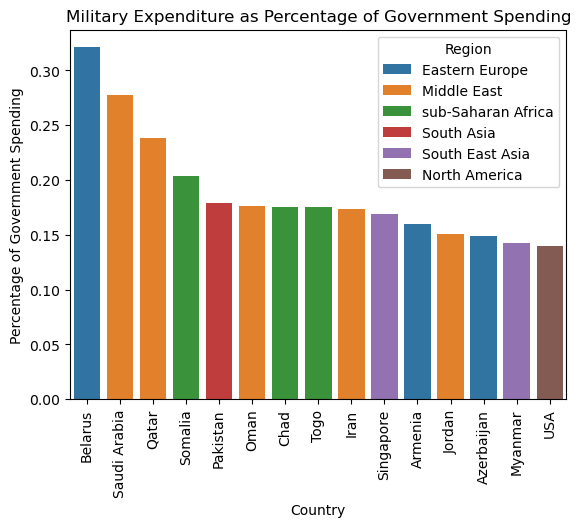

In [18]:
# resort the values to determine the largest gov't spend
top_15_govt_spend = df_2022.sort_values(by='2022_govt_spend', ascending=False).iloc[:15]

sns.barplot(data = top_15_govt_spend, x='Country', y='2022_govt_spend', hue='Region', dodge=False)
plt.ylabel('Percentage of Government Spending')
plt.title('Military Expenditure as Percentage of Government Spending')
plt.xticks(rotation=90)
plt.show()

## Government Budget on Military
- The data shows that Belarus is the country that allocates the greates portion of government spending on the military.
- The top countries in this list are not the highest spenders and are not considered to be the most powerful militaries
- The data relates to regions in the world were there is a greater level of geopolitical conflict.

## Further Work and Ideas in Progress
- Look at top military spenders and the percentage of GDP and government spending
- Investigate the distribution of the military expenditure as a percentage of GDP and government spending (plan to create some boxplots)
- Analysis idea is to create a column of GDP per capita
- compare it to the spending per capita, and see which countries 
 -calculate gdp_per_cap from the data rather than looking up the data.
- Explore relationship between military spending

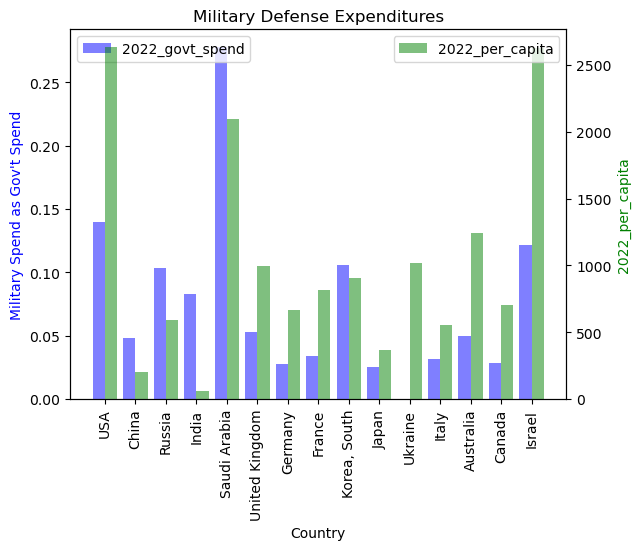

In [19]:
# create a plot to compare the military spending of top 20 militaries that looks at spending
# as a percentage of govt spending and spending per capita

# Create the DataFrame that sorts the top 20 countries by military spending in 2020
df_2020_plots = df_2022.sort_values(by='2022_USD', ascending=False)[:15]

# Define the width of each bar
bar_width = 0.4

# Create an array of x-positions for each category
x = np.arange(len(df_2020_plots['Country']))

# Create the figure and axis
fig, ax1 = plt.subplots()

# Create the bar graph for Graph1 on the left y-axis
ax1.bar(x - bar_width / 2, df_2020_plots['2022_govt_spend'], width=bar_width, color='b', alpha=0.5, label='2022_govt_spend')
ax1.set_xlabel('Country')
ax1.set_ylabel('Military Spend as Gov\'t Spend', color='b')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Create the bar graph for Graph2 on the right y-axis
ax2.bar(x + bar_width / 2, df_2020_plots['2022_per_capita'], width=bar_width, color='g', alpha=0.5, label='2022_per_capita')
ax2.set_ylabel('2022_per_capita', color='g')


# Set x-axis ticks and labels
ax1.set_xticks(x)
ax1.set_xticklabels(df_2020_plots['Country'], rotation=90)

# Add a legend for all bar graphs
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Military Defense Expenditures')


# Show the plot
plt.show()



In [20]:
# Analysis idea is to create a column of GDP per capita
# compare it to the spending per capita, and see which countries 
# calculate gdp_per_cap from the data rather than looking up the data.
def gdp_per_cap_calc(row):
    result = row['2022_per_capita']/row['2022_GDP']
    return result
df_2022['GDP_per_capita']= df_2022.apply(gdp_per_cap_calc, axis=1)
print(df_2022[['Country','GDP_per_capita']].head(10))
#results are in agreement with online sources 

            Country  GDP_per_capita
65              USA    76223.565733
87            China    12634.174385
134          Russia    14603.982585
83            India     2385.036610
168    Saudi Arabia    28193.310197
156  United Kingdom    44876.529910
143         Germany    47820.012158
142          France    42185.020006
90     Korea, South    33236.411236
88            Japan    33980.802879


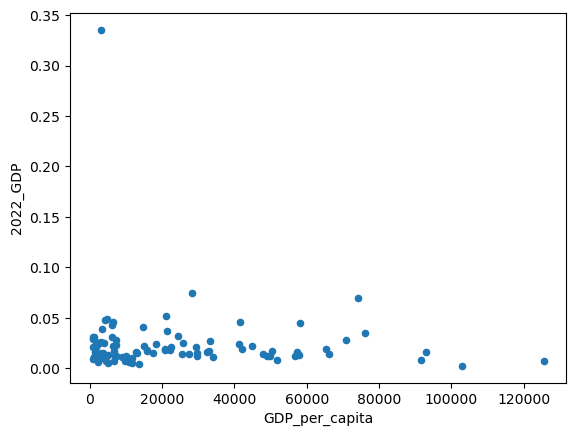

In [21]:
# investigate correlation between spending per capita and percentage of gov't spending.
df_2022.iloc[:100].plot(x='GDP_per_capita', y='2022_GDP', kind='scatter')
plt.show()